In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kneed import KneeLocator
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import plotly.graph_objects as go




In [2]:
data = pd.read_excel("C:/Users/johnr/Downloads/Adidas US Sales Datasets.xlsx")

In [3]:
data.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0               0.5     In-store  
1          150000.0               0.3     In-store

In [4]:
import datetime
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

# Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  9.648000e+03     9648.000000  9648.000000    9648.000000   
mean   1.173850e+06       45.216625   256.930037   93273.437500   
std    2.636038e+04       14.705397   214.252030  141916.016727   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4254.500000   
50%    1.185732e+06       45.000000   176.000000    9576.000000   
75%    1.185732e+06       55.000000   350.000000  150000.000000   
max    1.197831e+06      110.000000  1275.000000  825000.000000   

       Operating Profit  Operating Margin         Year  
count       9648.000000       9648.000000  9648.000000  
mean       34425.244761          0.422991  2020.865050  
std        54193.113713          0.097197     0.341688  
min            0.000000          0.100000  2020.000000  
25%         1921.752500          0.350000  2021.000000  
50%         4371.420000          0.410000  2021.000000  
75%        52062.500000          0.490000  2021.000000  
max       390000.000000          0.800000  2021.000000

# Uni Variate Analysis

<AxesSubplot:xlabel='Sales Method', ylabel='Count'>

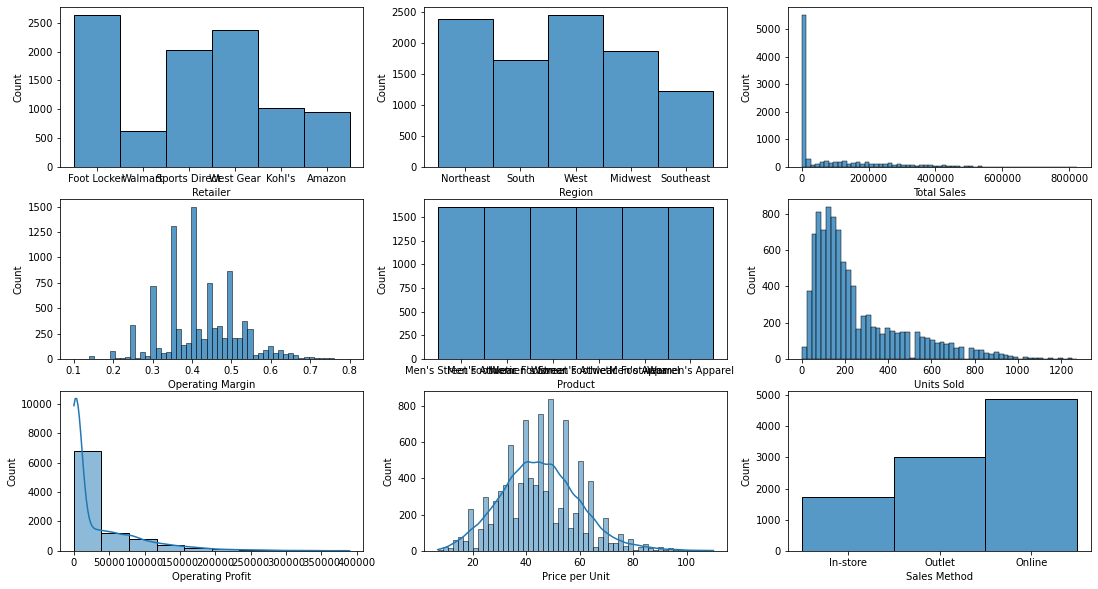

In [7]:
plt.figure(figsize = (25,10))


ax1 = plt.subplot2grid((3,4),(0,0))
sns.histplot(data['Retailer'])

ax1 = plt.subplot2grid((3,4),(0,1))
sns.histplot(data['Region'])

ax1 = plt.subplot2grid((3,4),(0,2))
sns.histplot(data['Total Sales'])

ax1 = plt.subplot2grid((3,4),(1,0))
sns.histplot(data['Operating Margin'])

ax1 = plt.subplot2grid((3,4),(1,1))
sns.histplot(data['Product'])

ax1 = plt.subplot2grid((3,4),(1,2))
sns.histplot(data['Units Sold'])

ax1 = plt.subplot2grid((3,4),(2,0))
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

ax1 = plt.subplot2grid((3,4),(2,1))
sns.histplot(data['Price per Unit'], kde = True)

ax1 = plt.subplot2grid((3,4),(2,2))
sns.histplot(data['Sales Method'])

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed. 'Operating Margin' almost takes the shape of a *proper* bell
4. Online sales are the highest
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

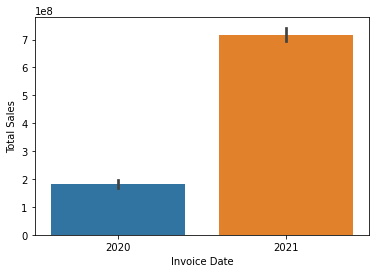

In [8]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales', estimator=sum)
plt.show()

<AxesSubplot:xlabel='Invoice Date', ylabel='Total Sales'>

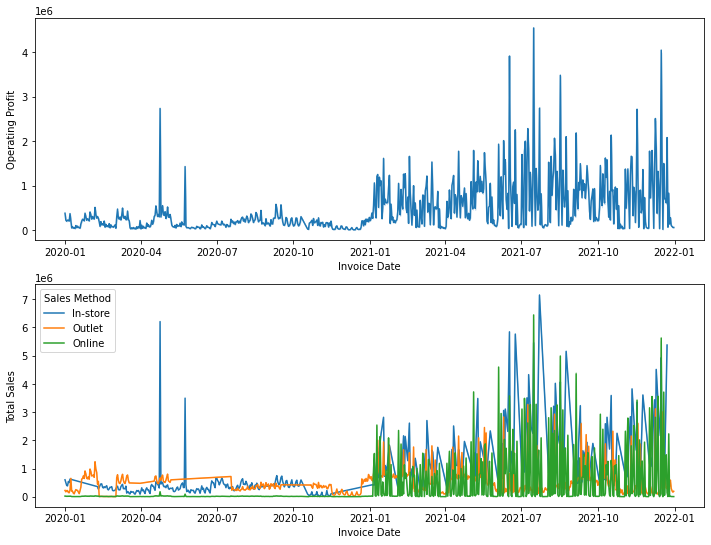

In [9]:
plt.figure(figsize = (12,9))

#Subplot Creation
ax1 = plt.subplot2grid((2,1),(0,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False, estimator=sum)


ax1 = plt.subplot2grid((2,1),(1,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method', estimator=sum)


### Plot 1
- Two irregular spikes between 04/2020 and 07/2020
- Proper increase in sales from 2021/01
- The profits stayed consistent post the dip with high spikes after 04/2021, Maximum Profit projected was September 2021
### Plot 2
- Introduction of online sales from 2021 resulted in the spike of Total Sales
- Total Sales from outlets is lowest out of all 3
- Significant increase in In-store sales from 2021

Text(0.5, 1.0, 'Overall sales across all sales methods')

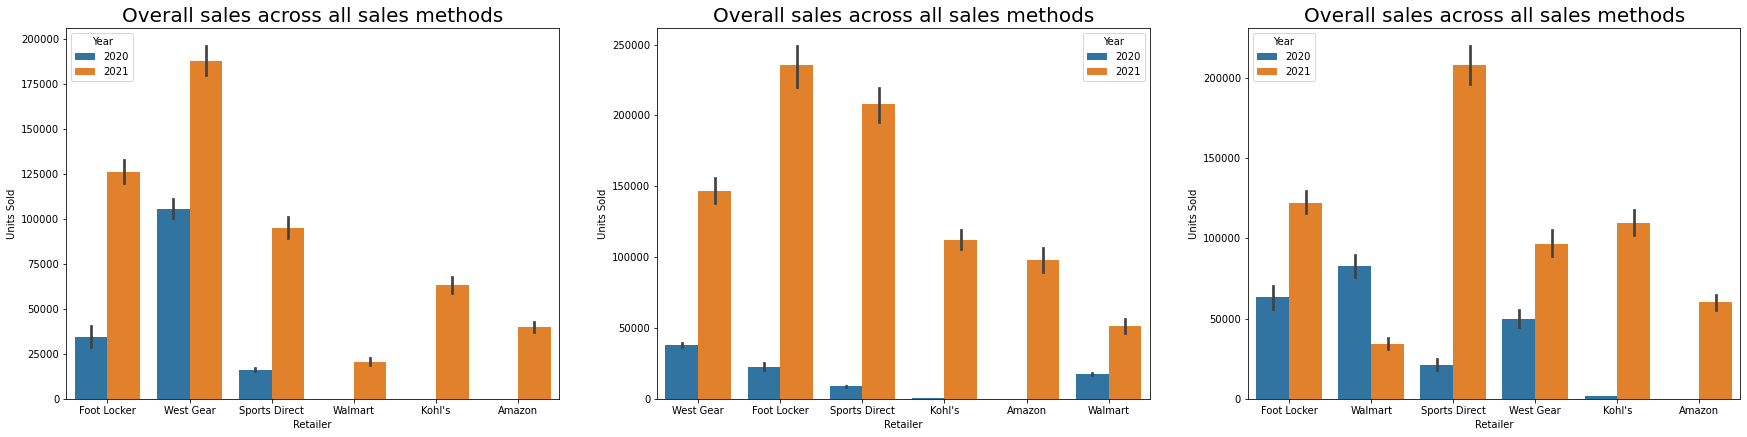

In [10]:
fig = plt.figure(figsize = (30,15))

#Subplot Creation
ax1 = plt.subplot2grid((2,3),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Overall sales across all sales methods',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Overall sales across all sales methods',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Overall sales across all sales methods',fontdict={'size': 20})


## Online sales
- Sales via 'Amazon' was started in the year 2021. Kohl's had a massive increase in Online sales as well
- Footlocker and WestGear have seen an increase in sales online vs 2020

## In-store sales
- West Gear and Foot Locker improved their In-Store sales significantly
- Walmart, Kohl's and Amazon also initiated in-store sales

## Outlet sales
- Sports Direcy had a massive increase in sales from outlet
- Walmart is the only retailer which projected less outlet sales in 2021 vs 2020


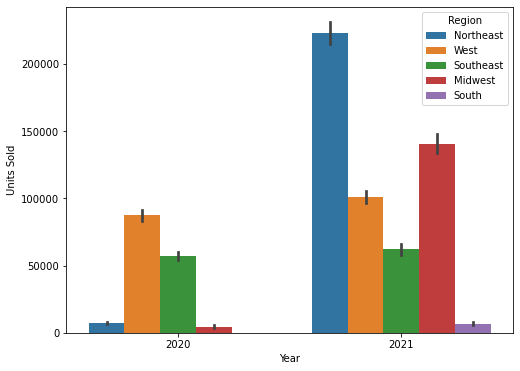

In [11]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum)
plt.show()

- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- South has been introduced in 2021
- Significant increase in the midwest region

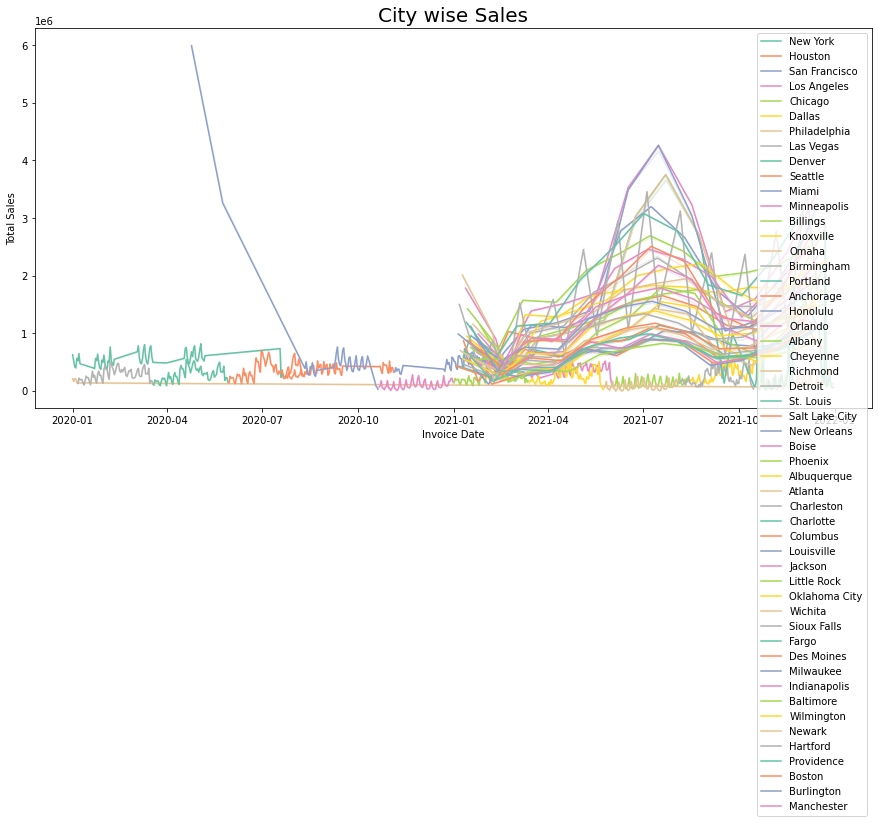

In [12]:
plt.figure(figsize = (15,7))
sns.lineplot(data = data,
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2', estimator=sum).set_title('City wise Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

## Observation
- Few cities in different regions had stints where sales were being made towards in the year 2020
- From Jan 2021, there was a massive influx in number of cities the sales were recorded from 
- This can be due to the option of purchasing online

# CORRELATION

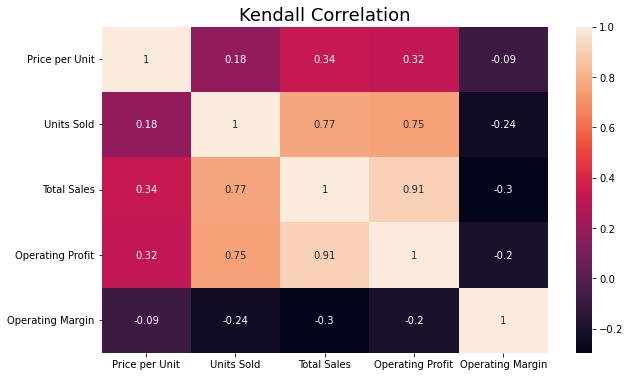

In [13]:
correlationData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
correlation = correlationData.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

#print('Features\'s correlation with Target Feature')
#for indx, cor in enumerate(correlation['Total Sales']):
 #   print(correlation.index[indx], cor)

# KEY TAKEAWAYS FROM EDA

1. Total Sales, Operating profit and Units Sold are interrelated and are **RIGHT SKEWED** AND 'Price Per unit' is normally distributed
2. 2021 has seen sudden spike in the Sales and Total sales due to the introduction of sales in a lot more cities.
3. Opening up online platform for sales gained a high influx of overall sales
4. A new region - 'South' was introduced in the year 2021
5. Kohl's, Walmart and Amazon also introduced 'In-store' sales in 2021


# CLUSTERING

### K means Clustering

In [14]:
# Omitting string columns
clusterData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

#### MIN-MAX SCALING

In [15]:
# Omitting string columns
clusterData1 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData1.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [16]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
minMaxData = pd.DataFrame(minMax.fit_transform(clusterData1),columns = minMax.feature_names_in_)
minMaxData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.417476    0.941176     0.727273          0.769231          0.571429
1        0.417476    0.784314     0.606061          0.384615          0.285714

In [17]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(minMaxData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [18]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 5)
kMeansClustering.fit(minMaxData)
#clusterData1['Clusters'] = kMeansClustering.predict(minMaxData)
clusterPred = pd.DataFrame(kMeansClustering.predict(minMaxData))
minMaxClusters = pd.concat([clusterData1.loc[:],clusterPred], axis = 1)
minMaxClusters.rename(columns = {0:'Clusters'}, inplace = True)
minMaxClusters

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0               50.0        1200     600000.0         300000.00   
1               50.0        1000     500000.0         150000.00   
2               40.0        1000     400000.0         140000.00   
3               45.0         850     382500.0         133875.00   
4               60.0         900     540000.0         162000.00   
...              ...         ...          ...               ...   
9643            50.0          64       3200.0            896.00   
9644            41.0         105       4305.0           1377.60   
9645            41.0         184       7544.0           2791.28   
9646            42.0          70       2940.0           1234.80   
9647            29.0          83       2407.0            649.89   

      Operating Margin  Clusters  
0                 0.50         4  
1                 0.30         4  
2                 0.35         4  
3                 0.35         4  
4                 0.30         4  
...                ...       ...  
9643              0.28         1  
9644              0.32         1  
9645              0.37         1  
9646              0.42         3  
9647              0.27         1  

[9648 rows x 6 columns]

In [19]:
import plotly.express as px
polar=minMaxClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [20]:
mmClustersScaled = pd.concat([minMaxData.loc[:],clusterPred], axis = 1)
mmClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=mmClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

## Observations: 


#### Cluster 0:
- Price per unit and Operating Margin are moderate but the Operating profit, Total Sales and units sold range very low
#### Cluster 1: 
- All attributes perform pretty well and it looks like the ideal cluster
#### Cluster 2: 
- Operating Margin trends high but the Total Sales and the Operating Profit almost don't exist
#### Cluster 3:
- Average Operating Profit is less than that of margin but all aspects trend uniformly
#### Cluster 4:
- Highest Operating Margin, Second highest Price per unit but sales, profit and Units sold almost range at 0






In [21]:
polar

Clusters          variable     value
0          0    Price per Unit  0.427218
1          1    Price per Unit  0.411945
2          2    Price per Unit  0.405482
3          3    Price per Unit  0.220804
4          4    Price per Unit  0.538072
5          0        Units Sold  0.108873
6          1        Units Sold  0.134013
7          2        Units Sold  0.370910
8          3        Units Sold  0.109421
9          4        Units Sold  0.591069
10         0       Total Sales  0.010949
11         1       Total Sales  0.054124
12         2       Total Sales  0.270907
13         3       Total Sales  0.014248
14         4       Total Sales  0.558113
15         0  Operating Profit  0.012318
16         1  Operating Profit  0.038149
17         2  Operating Profit  0.204783
18         3  Operating Profit  0.012260
19         4  Operating Profit  0.447626
20         0  Operating Margin  0.612961
21         1  Operating Margin  0.353758
22         2  Operating Margin  0.374513
23         3  Operating Margin  0.491193
24         4  Operating Margin  0.404824

#### STANDARD SCALING

In [22]:
clusterData2 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [23]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaledData = pd.DataFrame(standardScaler.fit_transform(clusterData2), columns = standardScaler.feature_names_in_)
standardScaledData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.325297    4.401913     3.570794          4.900780          0.792333
1        0.325297    3.468385     2.866115          2.132757         -1.265442

In [24]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [25]:
#pip install kneed
from kneed import KneeLocator
inertiaLocator = KneeLocator(
        range(1,11), 
        inertia, 
        S=0.1, curve="convex", direction="decreasing")

elbow = inertiaLocator.elbow   
print("elbow at k =", f'{elbow:.0f} clusters')

elbow at k = 3 clusters


In [26]:
# from sklearn import metrics
# print(f"Silhouette Coefficient: {metrics.silhouette_score(standardScaledData, ssClusterPreds):.3f}")

In [27]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 2)
kMeansClustering.fit(standardScaledData)
#clusterData2['Clusters'] = kMeansClustering.predict(standardScaledData)
ssClusterPreds = pd.DataFrame(kMeansClustering.predict(standardScaledData))
ssClusters = pd.concat([clusterData2.loc[:],ssClusterPreds], axis = 1)
ssClusters.rename(columns = {0:'Clusters'}, inplace = True)
ssClusters.head(2)
#standardScaledData['Clusters'] = kMeansClustering.predict(standardScaledData)
#clusterData2

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin  Clusters  
0               0.5         1  
1               0.3         1

In [28]:
from sklearn import metrics
print(f"Silhouette Coefficient: {metrics.silhouette_score(standardScaledData, ssClusterPreds):.3f}")

C:\Users\johnr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Silhouette Coefficient: 0.487


In [29]:
polar=ssClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [30]:
ssClustersScaled = pd.concat([standardScaledData.loc[:],ssClusterPreds], axis = 1)
ssClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=ssClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Observations

#### Cluster 0:
- Highest Operating Margin whereas the 'Price per unit' is moderate. Units sold, Total Sales and Profit are low
#### Cluster 1:
- Lowest operating Margin but rest of the features are high in relation to Operating Margin
#### Cluster 2: 
- Low Operating Margin but all the rest of the features are high

In [31]:
polar

Clusters          variable     value
0         0    Price per Unit -0.201079
1         1    Price per Unit  0.650549
2         0        Units Sold -0.460984
3         1        Units Sold  1.491419
4         0       Total Sales -0.479027
5         1       Total Sales  1.549792
6         0  Operating Profit -0.457926
7         1  Operating Profit  1.481526
8         0  Operating Margin  0.181311
9         1  Operating Margin -0.586593

<AxesSubplot:xlabel='Price per Unit', ylabel='Total Sales'>

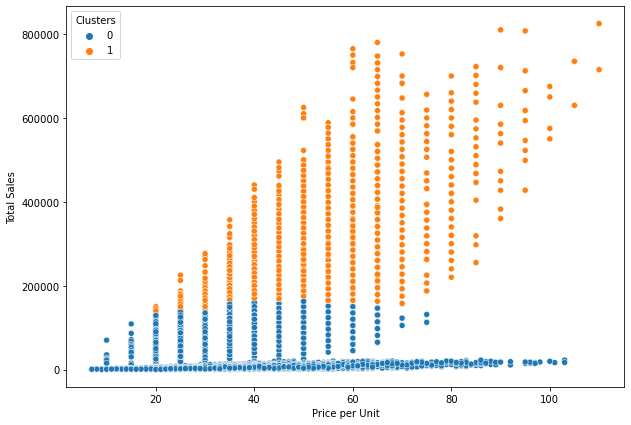

In [32]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = ssClusters, x = 'Price per Unit', y = 'Total Sales', hue = 'Clusters')

## CLUSTERING WITH ONLY TWO FEATURES

In [33]:
clusterDataColumns = data[['Price per Unit', 'Operating Margin']]
clusterDataColumns.head(2)

Price per Unit  Operating Margin
0            50.0               0.5
1            50.0               0.3

In [34]:
from sklearn.preprocessing import StandardScaler
standardScalerColumn = StandardScaler()
standardScaledColumn = pd.DataFrame(standardScaler.fit_transform(clusterDataColumns), columns = standardScaler.feature_names_in_)
standardScaledColumn.head(2)

Price per Unit  Operating Margin
0        0.325297          0.792333
1        0.325297         -1.265442

In [35]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledColumn)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [36]:
#pip install kneed
from kneed import KneeLocator
inertiaLocator = KneeLocator(
        range(1,11), 
        inertia, 
        S=0.1, curve="convex", direction="decreasing")

elbow = inertiaLocator.elbow   
print("elbow at k =", f'{elbow:.0f} clusters')

elbow at k = 3 clusters


In [37]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 4)
kMeansClustering.fit(standardScaledColumn)
standardScaledColumn['Clusters'] = kMeansClustering.predict(standardScaledColumn)

<AxesSubplot:xlabel='Operating Margin', ylabel='Price per Unit'>

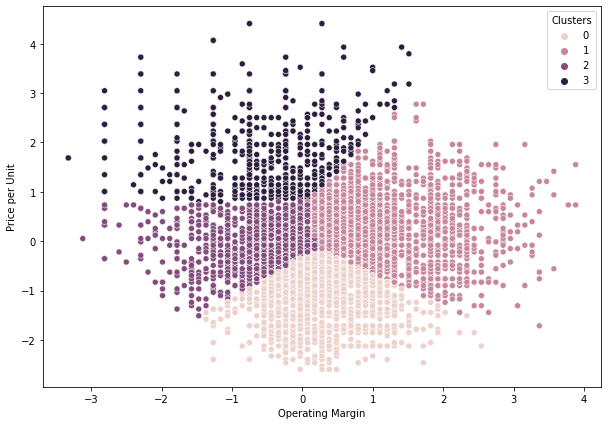

In [38]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = standardScaledColumn, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

In [39]:
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

# Cluster Analysis 

In [40]:
clusterAnalysisData = pd.concat([data.loc[:,['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product']],ssClusters], axis = 1)
clusterAnalysisData.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin  Clusters  
0          300000.0               0.5         1  
1          150000.0               0.3         1

<AxesSubplot:xlabel='Retailer', ylabel='Total Sales'>

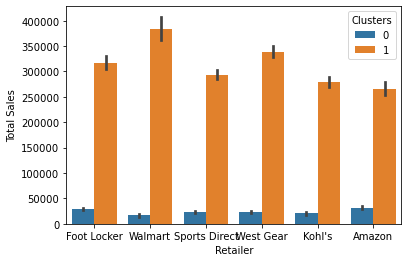

In [41]:
sns.barplot(data = clusterAnalysisData, x = "Retailer", y = "Total Sales", hue = "Clusters" )

In [42]:
clusterAnalysisData['Clusters'].value_counts()

0    7370
1    2278
Name: Clusters, dtype: int64

# Clustering + Catrgotical Variables

In [43]:
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Year'],
      dtype='object')

In [44]:
clusteringData = data[['Retailer','Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]
clusteringData.head(2)

Retailer     Region     State      City                  Product  \
0  Foot Locker  Northeast  New York  New York    Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York  Men's Athletic Footwear   

   Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin Sales Method  
0               0.5     In-store  
1               0.3     In-store

In [45]:
dummiedData = pd.get_dummies(clusteringData,drop_first=False)
dummiedData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin  Retailer_Amazon  Retailer_Foot Locker  Retailer_Kohl's  \
0               0.5                0                     1                0   
1               0.3                0                     1                0   

   Retailer_Sports Direct  Retailer_Walmart  ...  City_Wilmington  \
0                       0                 0  ...                0   
1                       0                 0  ...                0   

   Product_Men's Apparel  Product_Men's Athletic Footwear  \
0                      0                                0   
1                      0                                1   

   Product_Men's Street Footwear  Product_Women's Apparel  \
0                              1                        0   
1                              0                        0   

   Product_Women's Athletic Footwear  Product_Women's Street Footwear  \
0                                  0                                0   
1                                  0                                0   

   Sales Method_In-store  Sales Method_Online  Sales Method_Outlet  
0                      1                    0                    0  
1                      1                    0                    0  

[2 rows x 127 columns]

In [46]:
dummiedData.columns

Index(['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Retailer_Amazon', 'Retailer_Foot Locker',
       'Retailer_Kohl's', 'Retailer_Sports Direct', 'Retailer_Walmart',
       ...
       'City_Wilmington', 'Product_Men's Apparel',
       'Product_Men's Athletic Footwear', 'Product_Men's Street Footwear',
       'Product_Women's Apparel', 'Product_Women's Athletic Footwear',
       'Product_Women's Street Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=127)

In [47]:
from sklearn.decomposition import PCA
dummyPca = PCA(n_components=20)
salesPca= dummyPca.fit_transform(dummiedData)
pcaData = pd.DataFrame(salesPca)
pcaData

0             1           2          3         4         5   \
0     567347.841601 -73614.165436 -174.464216  -2.794048  0.257417 -0.748332   
1     421581.250483  32461.937157 -211.486414  -4.250627  0.429188 -1.132162   
2     324308.109109   7204.801893 -326.281353  -1.529455  0.375143 -1.051656   
3     305769.702896   6889.032309 -200.054007  -2.686103  0.235278 -0.987682   
4     463261.417061  35060.085654  -58.390422  -4.682978  0.273343 -1.087322   
...             ...           ...         ...        ...       ...       ...   
9643  -96111.406298    253.964193   68.545602   5.029521 -1.009272 -0.922234   
9644  -94907.943700    184.909573   28.698186  -1.823927 -0.908060 -0.912122   
9645  -91379.686280    -19.363446  -45.529027   2.142012 -0.795291 -0.958976   
9646  -96237.949620   -153.924444   62.134329  -2.589407 -0.893004 -0.889776   
9647  -96940.538185    210.148089   47.363277 -14.797615 -0.821846 -0.812303   

            6         7         8         9         10        11        12  \
0    -1.506454 -0.426709 -0.358768  0.414295  0.026957 -0.193149  0.291038   
1    -0.969786 -0.482462 -0.108118  0.462669 -0.065340 -0.355662 -0.205588   
2    -1.298608 -0.578039 -0.099070  0.326155  0.200747  0.745522  0.211684   
3    -1.121421 -0.499631 -0.107296  0.305683  0.317379 -0.374582 -0.286898   
4    -0.674645 -0.345286 -0.015851  0.439451 -0.032539 -0.145800  0.669727   
...        ...       ...       ...       ...       ...       ...       ...   
9643 -0.525817  0.302072 -0.083898  0.293130  0.000320 -0.141717  0.630844   
9644 -0.617200  0.265585 -0.170626  0.353381 -0.155336  0.355394 -0.583202   
9645 -0.824991  0.179956 -0.270815  0.376479 -0.121464 -0.174533  0.265390   
9646 -0.610948  0.233708 -0.289588  0.344323 -0.024692 -0.353246 -0.235124   
9647 -0.659388  0.183809 -0.448681  0.275499  0.201965  0.749452  0.201744   

            13        14        15        16        17        18        19  
0    -0.121631 -0.406641 -0.143438 -0.044776 -0.186366 -0.054152  0.247492  
1     0.668401 -0.488670 -0.484227  0.098091 -0.445068  0.011996  0.055950  
2     0.068545 -0.416954 -0.871418  0.056693 -0.563591  0.091689  0.046169  
3    -0.532285 -0.457327 -0.959301  0.114578 -0.582532  0.064103  0.061341  
4    -0.070994 -0.715455 -0.403575  0.570295 -0.650050  0.011709  0.065939  
...        ...       ...       ...       ...       ...       ...       ...  
9643  0.052757 -0.145223  0.004178  0.326564 -0.347155 -0.018720 -0.157143  
9644 -0.112959 -0.180761  0.402746  0.345314 -0.157986 -0.024220 -0.129912  
9645 -0.312024  0.095973  0.547837 -0.360523  0.182801 -0.099735 -0.140648  
9646  0.799521  0.097215  0.088691 -0.226608 -0.004295 -0.098093 -0.119814  
9647  0.144839  0.158898 -0.082214 -0.277277 -0.091788 -0.080182 -0.111463  

[9648 rows x 20 columns]

In [48]:
#Scaling the Dummied Data
standardScaledDummies = pd.DataFrame(standardScaler.fit_transform(dummiedData), columns = standardScaler.feature_names_in_)

#Checking ideal number of clusters
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledDummies)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

### Choosing 6 as the ideal cluster 

In [49]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 6)
kMeansClustering.fit(standardScaledDummies)
dummyPreds = pd.DataFrame(kMeansClustering.predict(standardScaledDummies))
dummyPreds = pd.concat([standardScaledDummies.loc[:],dummyPreds], axis = 1)
dummyPreds.rename(columns = {0:'Clusters'}, inplace = True)
dummyPreds.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0        0.325297    4.401913     3.570794          4.900780   
1        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Retailer_Amazon  Retailer_Foot Locker  Retailer_Kohl's  \
0          0.792333        -0.330292              1.630553        -0.345713   
1         -1.265442        -0.330292              1.630553        -0.345713   

   Retailer_Sports Direct  Retailer_Walmart  ...  Product_Men's Apparel  \
0               -0.516533         -0.263412  ...               -0.44688   
1               -0.516533         -0.263412  ...               -0.44688   

   Product_Men's Athletic Footwear  Product_Men's Street Footwear  \
0                        -0.447547                       2.234401   
1                         2.234401                      -0.447547   

   Product_Women's Apparel  Product_Women's Athletic Footwear  \
0                -0.447214                           -0.44688   
1                -0.447214                           -0.44688   

   Product_Women's Street Footwear  Sales Method_In-store  \
0                        -0.447214                2.13186   
1                        -0.447214                2.13186   

   Sales Method_Online  Sales Method_Outlet  Clusters  
0            -1.013566             -0.67485         0  
1            -1.013566             -0.67485         0  

[2 rows x 128 columns]

In [50]:
polar=dummyPreds.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [51]:
polar

Clusters             variable     value
0           0       Price per Unit  0.100300
1           1       Price per Unit -0.405269
2           2       Price per Unit  0.082595
3           3       Price per Unit  0.359550
4           4       Price per Unit -0.598448
..        ...                  ...       ...
757         1  Sales Method_Outlet -0.047322
758         2  Sales Method_Outlet -0.083592
759         3  Sales Method_Outlet  0.116277
760         4  Sales Method_Outlet -0.674850
761         5  Sales Method_Outlet  0.403480

[762 rows x 3 columns]

# Using K modes/K prototype for Clustering

In [52]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [53]:
prototypeData = data[['Retailer', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]

prototypeArray = prototypeData.values
prototypeData.head(1)

Retailer     Region     State      City                Product  \
0  Foot Locker  Northeast  New York  New York  Men's Street Footwear   

   Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   

   Operating Margin Sales Method  
0               0.5     In-store

In [54]:
numeric = prototypeData.select_dtypes(exclude = 'object')
categoric = prototypeData.select_dtypes(include = 'object')

numeric = pd.DataFrame(standardScaler.fit_transform(numeric), columns = standardScaler.feature_names_in_)
prototypeData_scaled = pd.concat([categoric,numeric], axis = 1)
prototypeData_scaled
prototypeArray = prototypeData_scaled.values
prototypeData_scaled.head(2)

Retailer     Region     State      City                  Product  \
0  Foot Locker  Northeast  New York  New York    Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York  Men's Athletic Footwear   

  Sales Method  Price per Unit  Units Sold  Total Sales  Operating Profit  \
0     In-store        0.325297    4.401913     3.570794          4.900780   
1     In-store        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  
0          0.792333  
1         -1.265442

In [55]:
prototypeArray[:,0] = prototypeArray[:,0].astype(str)
prototypeArray[:,1] = prototypeArray[:,1].astype(str)
prototypeArray[:,2] = prototypeArray[:,2].astype(str)
prototypeArray[:,3] = prototypeArray[:,3].astype(str)
prototypeArray[:,4] = prototypeArray[:,4].astype(str)
prototypeArray[:,5] = prototypeArray[:,5].astype(str)
prototypeArray[:,6] = prototypeArray[:,6].astype(float)
prototypeArray[:,7] = prototypeArray[:,7].astype(float) 
prototypeArray[:,8] = prototypeArray[:,8].astype(float)
prototypeArray[:,9] = prototypeArray[:,9].astype(float)
prototypeArray[:,10] = prototypeArray[:,10].astype(float)
prototypeArray

array([['Foot Locker', 'Northeast', 'New York', ..., 3.5707937478397023,
        4.900779846629518, 0.7923327479055631],
       ['Foot Locker', 'Northeast', 'New York', ..., 2.866115127831559,
        2.132757048936695, -1.2654417148775199],
       ['Foot Locker', 'Northeast', 'New York', ..., 2.1614365078234155,
        1.9482221957571735, -0.7509980991817493],
       ...,
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6041170171157438, -0.5837569042578338, -0.5452206529034402],
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6365604207809187, -0.6124793850855199, -0.03077703720766968],
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6403163578255622, -0.6232730131828433, -1.574107884294982]],
      dtype=object)

In [56]:
# from kmodes.kprototypes import KPrototypes

#                                     # Choose optimal K using Elbow method
# cost = []
# for cluster in range(1, 10):
#     try:
#         kp = KPrototypes(n_jobs = -1, n_clusters = cluster, random_state = 42)
#         kp.fit_predict(prototypeArray, categorical = [0,1,2,3,4,5])
#         cost.append(kp.cost_)
#         print('Cluster initiation: {}'.format(cluster))
#     except:
#       break

        
# cluster = range(1,10)
# plt.plot(cluster,cost,'-o')
# plt.xticks(cluster)

In [57]:
# #pip install kneed
# from kneed import KneeLocator
# inertiaLocator = KneeLocator(
#         range(1,10), 
#         cost, 
#         S=0.1, curve="convex", direction="decreasing")

# elbow = inertiaLocator.elbow   
# print("elbow at k =", f'{elbow:.0f} clusters')

In [58]:
# #Converting the results into a dataframe and plotting them
# df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# df_cost
# sns.scatterplot(data = df_cost, x = 'Cluster', y = 'Cost')

In [59]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters = 2, random_state = 42)
kp.fit(prototypeArray, categorical = [0,1,2,3,4,5])

KPrototypes(gamma=0.5, n_clusters=2, random_state=42)

In [60]:
kpPreds = pd.DataFrame(kp.predict(prototypeArray, categorical = [0,1,2,3,4,5]))
kpPreds.rename(columns = {0:'Clusters'}, inplace = True)
kpDataFrame = pd.concat([prototypeData_scaled.loc[:],kpPreds], axis = 1)
kpDataFrame.head(2)

Retailer     Region     State      City                  Product  \
0  Foot Locker  Northeast  New York  New York    Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York  Men's Athletic Footwear   

  Sales Method  Price per Unit  Units Sold  Total Sales  Operating Profit  \
0     In-store        0.325297    4.401913     3.570794          4.900780   
1     In-store        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Clusters  
0          0.792333         1  
1         -1.265442         1

In [61]:
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Observations: 
- Cluster number 1 is the biggest cluster where the Operating Margin is highest where as the price is the second highest. Total Sales and Profit seems to be in the lower side of things as well
- Cluster 0 which is the smallest of all has a nature of having low 'Operating Margin' and high sales and profit
- Cluster 2 has the lowest Operating Margin with a decent average price
- Cluster 3 has a good Operating Margin considering the ratio to it's respective sales

In [62]:
kpDataFrame['Clusters'].value_counts()

0    7370
1    2278
Name: Clusters, dtype: int64

In [63]:
clusterProfile = kpDataFrame.groupby('Clusters').agg({
    "Price per Unit": "mean",
    "Units Sold": "mean",
    "Total Sales": "mean",
    "Operating Profit": "mean",
    "Operating Margin": "mean",
    "Retailer": lambda x:x.value_counts().index[0],
    "Region":  lambda x:x.value_counts().index[0],
    "State":  lambda x:x.value_counts().index[0],
    "City": lambda x:x.value_counts().index[0],
    "Sales Method": lambda x:x.value_counts().index[0]
})
clusterProfile

Price per Unit  Units Sold  Total Sales  Operating Profit  \
Clusters                                                              
0              -0.199510   -0.461551    -0.478713         -0.457685   
1               0.645473    1.493253     1.548778          1.480747   

          Operating Margin     Retailer     Region     State        City  \
Clusters                                                                   
0                 0.181101  Foot Locker  Northeast     Texas    Portland   
1                -0.585915    West Gear       West  New York  Charleston   

         Sales Method  
Clusters               
0              Online  
1            In-store

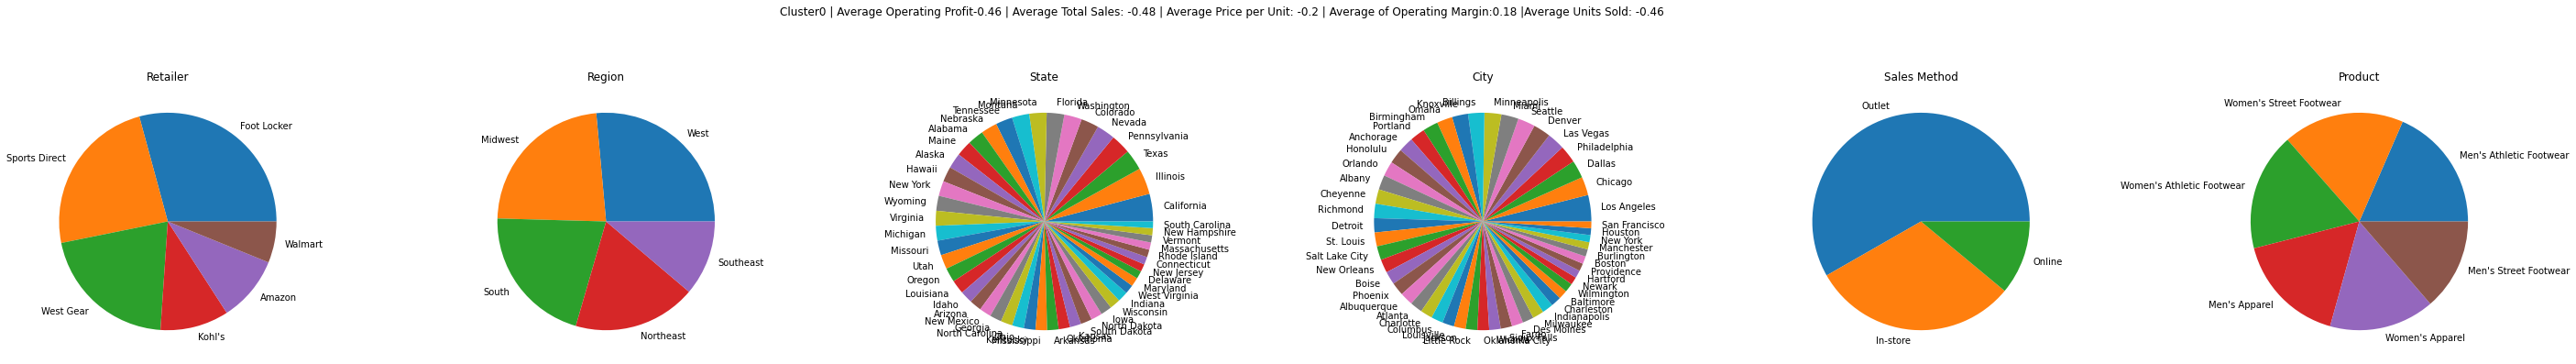

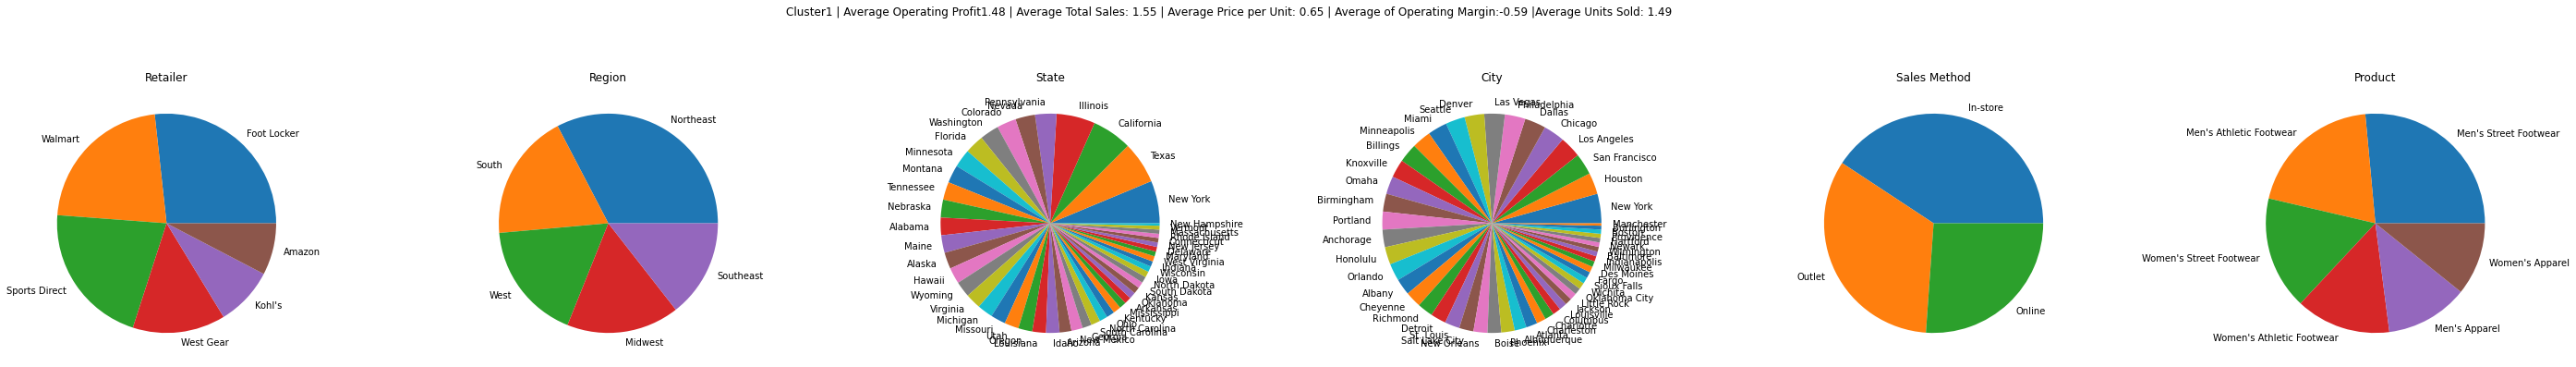

In [64]:
def cluster_pie(df):
    c = len(df.select_dtypes('object').nunique())
    K = df['Clusters'].nunique()
    for k in range(K):
        #Sub dataframe with respect to the cluster in the loop
        dfc = df[df['Clusters'] == k]
        
        #Numeric Features Metrics
        op = dfc['Operating Profit'].mean()
        ts = dfc['Total Sales'].mean()
        ppu = dfc['Price per Unit'].mean()
        om = dfc['Operating Margin'].mean()
        us = dfc['Units Sold'].mean()
        
        #Plot Characteristics
        fig = plt.figure(figsize = (50,12))
        fig.suptitle("Cluster" + str(k) + " | Average Operating Profit" + str(round(op,2)) + " | Average Total Sales: " + str(round(ts,2)) +
                    " | Average Price per Unit: " + str(round(ppu,2)) + " | Average of Operating Margin:" + str(round(om,2)) +
                     " |Average Units Sold: " + str(round(us,2)))
        
        #Subplot Creation
        ax1 = plt.subplot2grid((2,c),(0,0))
        plt.pie(dfc['Retailer'].value_counts(), labels = dfc['Retailer'].unique())
        plt.title("Retailer")

        ax1 = plt.subplot2grid((2,c),(0,1))
        plt.pie(dfc['Region'].value_counts(), labels = dfc['Region'].unique())
        plt.title("Region")

        ax1 = plt.subplot2grid((2,c),(0,2))
        plt.pie(dfc['State'].value_counts(), labels = dfc['State'].unique())
        plt.title("State")

        ax1 = plt.subplot2grid((2,c),(0,3))
        plt.pie(dfc['City'].value_counts(), labels = dfc['City'].unique())
        plt.title("City")
    
        ax1 = plt.subplot2grid((2,c),(0,4))
        plt.pie(dfc['Sales Method'].value_counts(), labels = dfc['Sales Method'].unique())
        plt.title("Sales Method")
        
        ax1 = plt.subplot2grid((2,c),(0,5))
        plt.pie(dfc['Product'].value_counts(), labels = dfc['Product'].unique())
        plt.title("Product")

        

cluster_pie(kpDataFrame)


#### Cluster 0 (Possible Luxury shoes like yeezeys): 
- Highest average price and the most units sold 
- Heavily into footwear and least in apparel out of all clusters
- Low 'Operating Margin' with respect to the amount of sales which can imply that the 'Operational costs' are high
- Highly based out of New York, Texas and California
- Street footwear has the highest contributed products

#### Cluster 1:
- Has the highest operating margin and is highly based out of outlets 
- Lowest usage of online method for sales
- Apparel are the highest selling products
- Profit maximization is a great potential with this cluster characteristic as the profit for one unit of sale is high

#### Cluster 2:
- Only cluster where Footlocker is not a major contributor
- Lowest Operational Margin out of all clusters
- The units sold for these products tend to do good and include Street footwear mostly but of a lower price range
- Resembles 'Cluster 0' in many ways but sales method is skewed towards outlet as opposed to in-store


#### Cluster 3: 
- Least average price out of all the clusters
- High operating margin with respect to the profit and sales
- Very less based out in the 'North east' region when compared to the other clusters


In [65]:
data[(data['Sales Method'] == 'In-store')]

Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
3839       Amazon      1185732   2021-06-19  Northeast  New Hampshire   
3840       Amazon      1185732   2021-06-19  Northeast  New Hampshire   
3841       Amazon      1185732   2021-06-19  Northeast  New Hampshire   
3842       Amazon      1185732   2021-06-19  Northeast  New Hampshire   
3843       Amazon      1185732   2021-07-17  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear            50.0        1200   
1       New York    Men's Athletic Footwear            50.0        1000   
2       New York    Women's Street Footwear            40.0        1000   
3       New York  Women's Athletic Footwear            45.0         850   
4       New York              Men's Apparel            60.0         900   
...          ...                        ...             ...         ...   
3839  Manchester    Women's Street Footwear            55.0         350   
3840  Manchester  Women's Athletic Footwear            55.0         325   
3841  Manchester              Men's Apparel            65.0         325   
3842  Manchester            Women's Apparel            70.0         475   
3843  Manchester      Men's Street Footwear            65.0         700   

      Total Sales  Operating Profit  Operating Margin Sales Method  Year  
0        600000.0          300000.0              0.50     In-store  2020  
1        500000.0          150000.0              0.30     In-store  2020  
2        400000.0          140000.0              0.35     In-store  2020  
3        382500.0          133875.0              0.35     In-store  2020  
4        540000.0          162000.0              0.30     In-store  2020  
...           ...               ...               ...          ...   ...  
3839     192500.0           57750.0              0.30     In-store  2021  
3840     178750.0           53625.0              0.30     In-store  2021  
3841     211250.0           63375.0              0.30     In-store  2021  
3842     332500.0          116375.0              0.35     In-store  2021  
3843     455000.0          182000.0              0.40     In-store  2021  

[1740 rows x 14 columns]

<AxesSubplot:xlabel='Units Sold', ylabel='Operating Profit'>

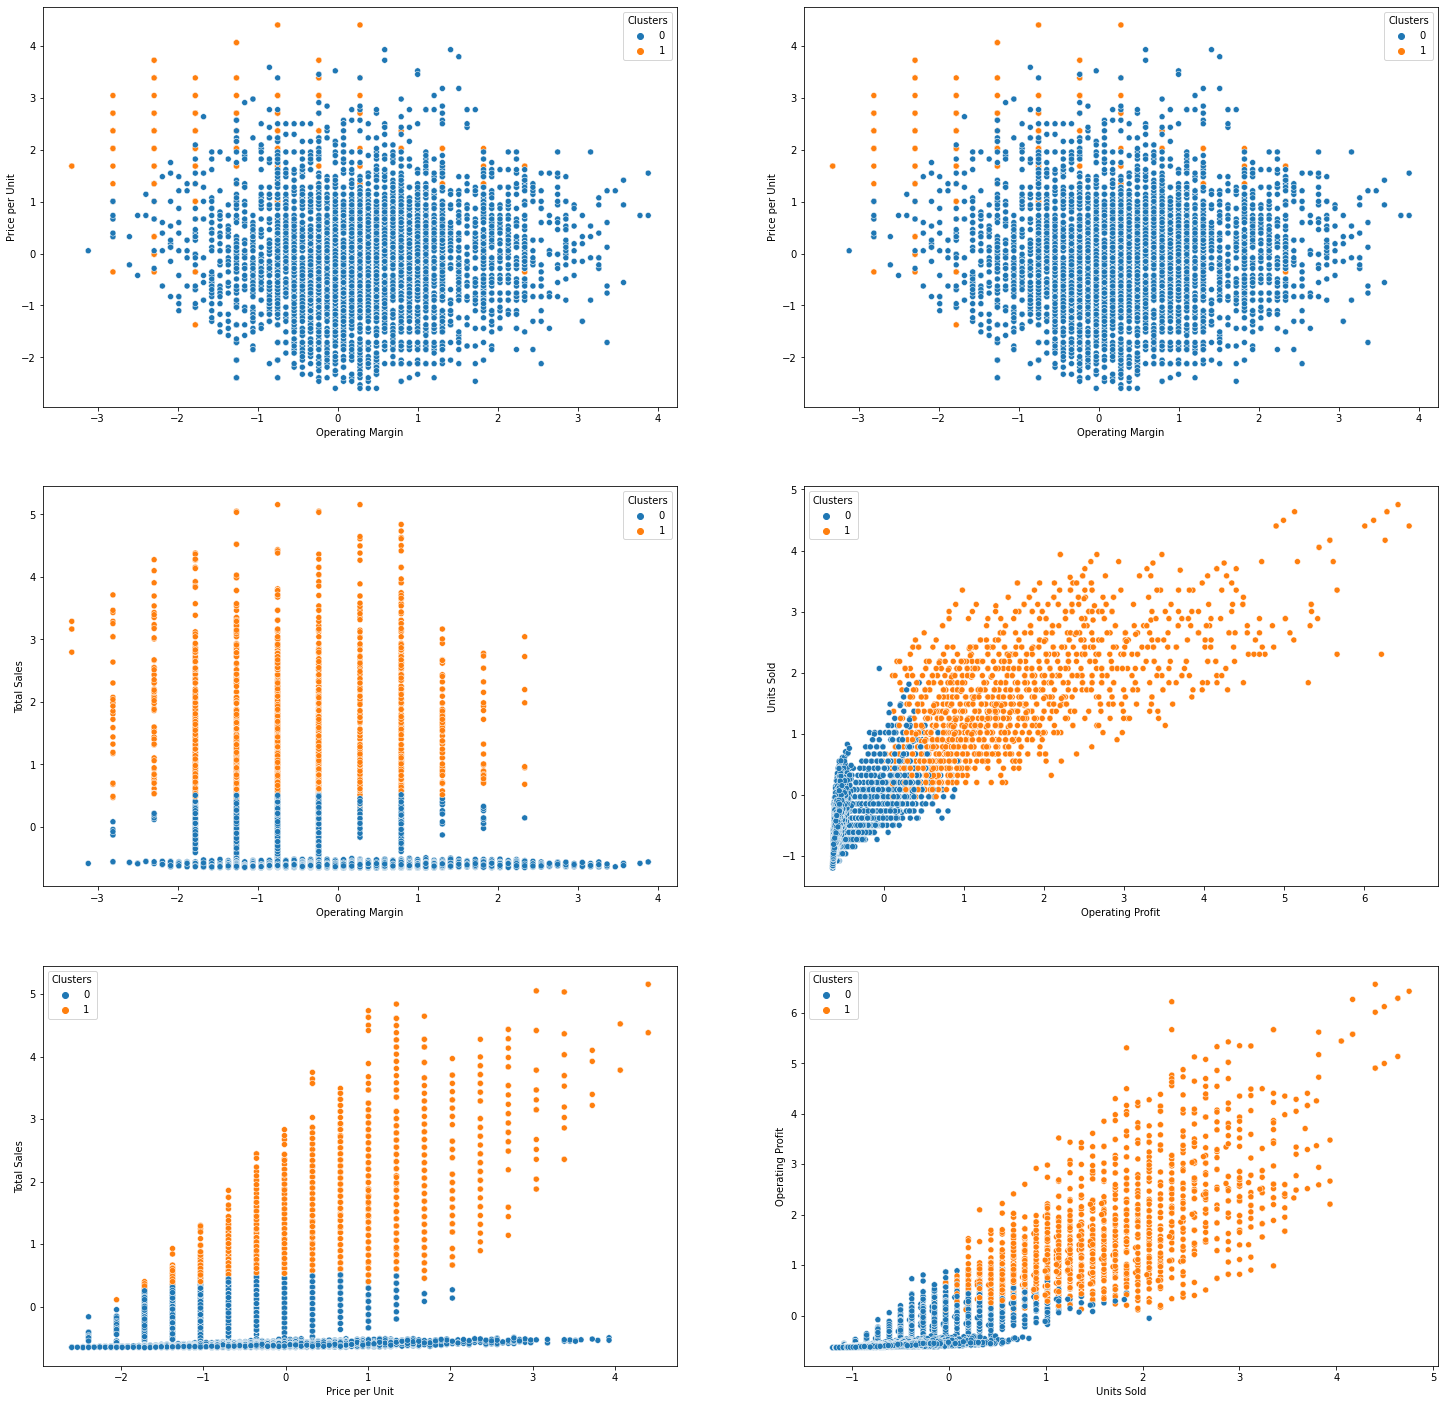

In [66]:
plt.figure(figsize = (25,25))

ax1 = plt.subplot2grid((3,2),(0,0))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(0,1))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(1,0))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Total Sales', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(1,1))
sns.scatterplot(data = kpDataFrame, x = 'Operating Profit', y = 'Units Sold', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(2,0))
sns.scatterplot(data = kpDataFrame, x = 'Price per Unit', y = 'Total Sales', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(2,1))
sns.scatterplot(data = kpDataFrame, x = 'Units Sold', y = 'Operating Profit', hue = 'Clusters')


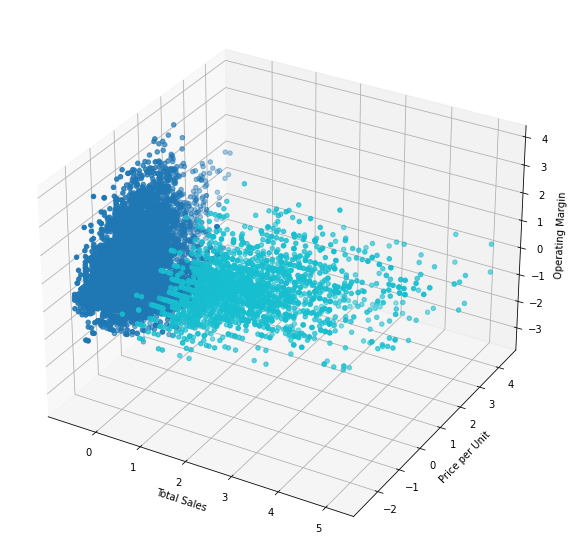

In [67]:
#3D Scatter Plot post Clustering
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')

x = kpDataFrame['Total Sales']
y = kpDataFrame['Price per Unit']
z = kpDataFrame['Operating Margin']

ax.scatter(x,y,z, c=kpDataFrame["Clusters"], cmap="tab10")
ax.set_xlabel('Total Sales')
ax.set_ylabel('Price per Unit')
ax.set_zlabel('Operating Margin')
plt.show()

# DB SCAN

In [68]:
dbs_data = clusterData.copy()
dbs_data_scaled = pd.DataFrame(standardScaler.fit_transform(dbs_data), columns = standardScaler.feature_names_in_)
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.55, min_samples = 10)
clusters = pd.DataFrame(dbs.fit_predict(dbs_data))

In [69]:
dbs_clusters = pd.concat([dbs_data_scaled.loc[:],clusters], axis = 1)
dbs_clusters.rename(columns = {0:'Clusters'}, inplace = True)
dbs_clusters.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0        0.325297    4.401913     3.570794          4.900780   
1        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Clusters  
0          0.792333        -1  
1         -1.265442        -1

In [70]:
dbs_clusters['Clusters'].value_counts().sum()

9648

In [71]:
dbs_clusters_unscaled = pd.concat([dbs_data.loc[:],clusters], axis = 1)
dbs_clusters_unscaled.rename(columns = {0:'Clusters'}, inplace = True)
dbs_clusters_unscaled.groupby("Clusters").mean().head(2)

Price per Unit  Units Sold   Total Sales  Operating Profit  \
Clusters                                                               
-1             45.160043  255.151557  91313.600967      33734.037213   
 0             45.000000  175.000000  78750.000000      27562.500000   

          Operating Margin  
Clusters                    
-1                0.425314  
 0                0.350000

# Hirearchal Clustering

In [72]:
agg_data = clusterData.copy()
agg_data_scaled = pd.DataFrame(standardScaler.fit_transform(agg_data), columns = standardScaler.feature_names_in_)
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters = 2)
add_clusters = pd.DataFrame(agg_clustering.fit_predict(agg_data_scaled))

In [73]:
agg_clusters = pd.concat([agg_data_scaled.loc[:],add_clusters], axis = 1)
agg_clusters.rename(columns = {0:'Clusters'}, inplace = True)
agg_clusters.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0        0.325297    4.401913     3.570794          4.900780   
1        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Clusters  
0          0.792333         0  
1         -1.265442         0

In [74]:
polar = agg_clusters.groupby("Clusters").mean().reset_index()
polar = pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [75]:
#Agglomerative clustering averages
agg_clusters_unscaled = pd.concat([agg_data.loc[:],add_clusters], axis = 1)
agg_clusters_unscaled.rename(columns = {0:'Clusters'}, inplace = True)
agg_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              53.173289  533.831862  284190.397351     104312.591979   
1              42.095960  148.326984   18394.318182       7014.882605   

          Operating Margin  
Clusters                    
0                 0.367826  
1                 0.444628

In [76]:
#K-prototype clustering averages
prototype_clusters_unscaled = pd.concat([prototypeData.loc[:],kpPreds], axis = 1)
prototype_clusters_unscaled.rename(columns = {0:'Clusters'}, inplace = True)
prototype_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              42.282904  158.046947   25339.908412       9623.134186   
1              54.708077  576.845917  313058.384548     114667.367208   

          Operating Margin  
Clusters                    
0                 0.440593  
1                 0.366045

In [77]:
#K-means Clustering Averages
kmeans_clusters_unscaled = pd.concat([data[['Retailer', 'Invoice Date', 'Region', 'State', 'City',
       'Product']],ssClusters], axis = 1)
kmeans_clusters_unscaled.groupby("Clusters").mean()

Price per Unit  Units Sold    Total Sales  Operating Profit  \
Clusters                                                                
0              42.259837  158.168385   25295.403664       9610.081269   
1              54.782704  576.453029  313202.370500     114709.597234   

          Operating Margin  
Clusters                    
0                 0.440613  
1                 0.365979

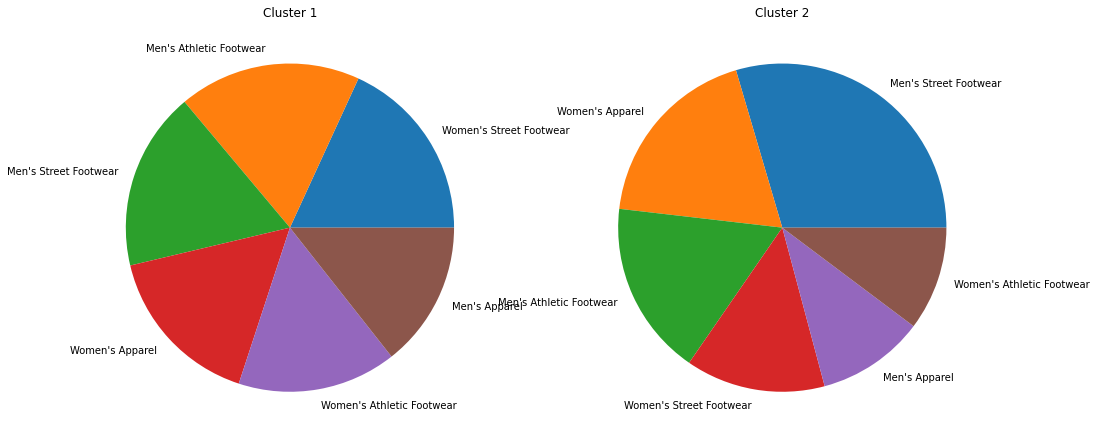

In [78]:
####  PRODUCT AS PER UNITS SOLD #####
plt.figure(figsize = (25,25))

for k in range(0,2):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Product']].groupby('Product').sum().sort_values(by='Units Sold', ascending=False)
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))


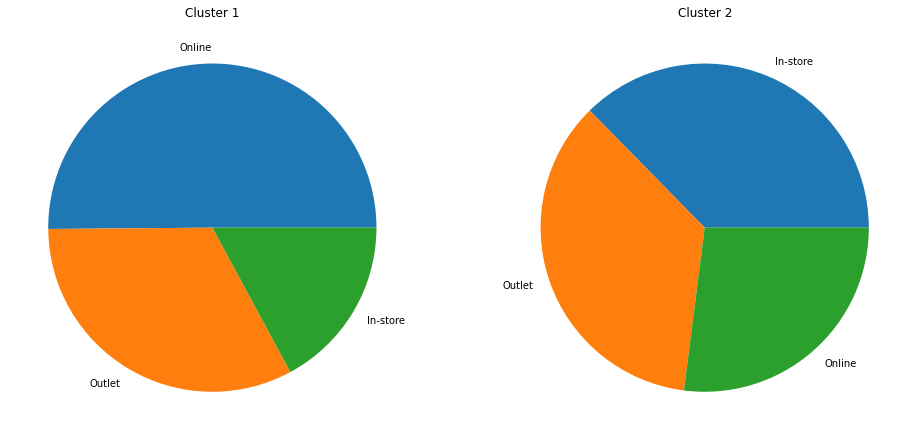

In [79]:
####  SALES METHOD AS PER UNITS SOLD #####
plt.figure(figsize = (25,25))

for k in range(0,2):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Sales Method']].groupby('Sales Method').sum().sort_values(by='Units Sold', ascending=False)
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))


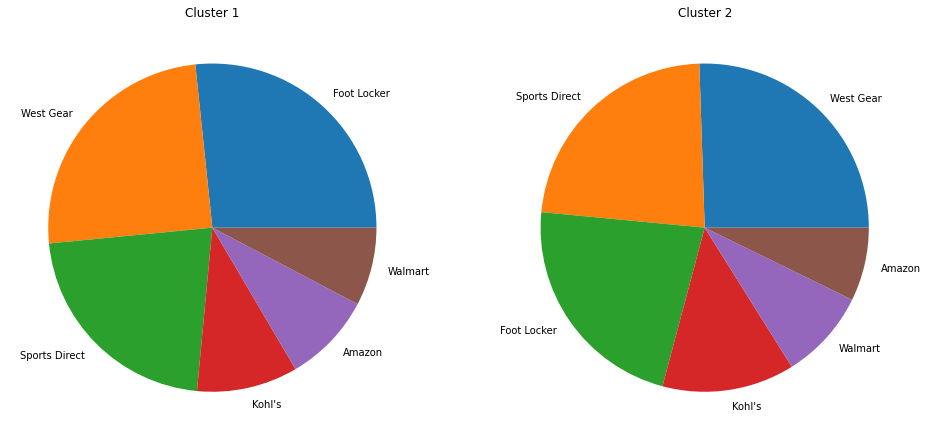

In [80]:
####  RETAILER AS PER UNITS SOLD #####
plt.figure(figsize = (25,25))

for k in range(0,2):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Retailer']].groupby('Retailer').sum().sort_values(by='Units Sold', ascending=False)
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))


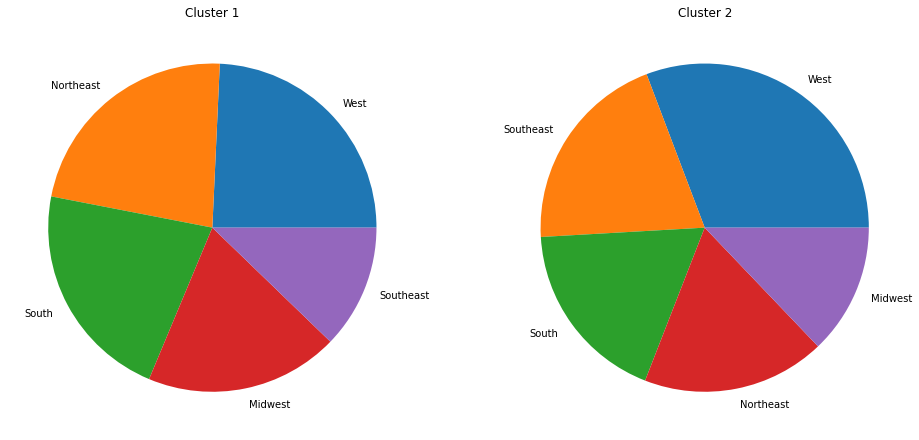

In [81]:
####  REGION AS PER UNITS SOLD #####
plt.figure(figsize = (25,25))

for k in range(0,2):
    
    ax1 = plt.subplot2grid((1,3),(0,k))
    a = prototype_clusters_unscaled[(kmeans_clusters_unscaled['Clusters'] == k)][['Units Sold', 'Region']].groupby('Region').sum().sort_values(by='Units Sold', ascending=False)
    plt.pie(a['Units Sold'], labels = a.index.unique())
    plt.title("Cluster " + str(k+1))
